In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

In [2]:
def dp(dist_mat):
    """
        Finds the minimum-cost path through the matrix 'dist_mat' using dynamic programming
        The cost of a path is defined as the sum of the matrix on that path.
        Returns a list of path indices and the cost matrix
    """
    N,M = dist_mat.shape

    # Initializing the cost matrix
    cost_mat = np.zeros((N+1,M+1))
    for i in range(1,N+1):
        cost_mat[i,0] = np.inf
    for i in range(1,M+1):
        cost_mat[0,i] = np.inf
    
    # Filling the cost matrix while keeping track of traceback information
    traceback_mat = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            penalty = [cost_mat[i,j],cost_mat[i,j+1],cost_mat[i+1,j]]
            i_penalty = np.argmin(penalty)
            cost_mat[i+1,j+1] = dist_mat[i,j]+penalty[i_penalty]
            traceback_mat[i,j] = i_penalty
    
    # Traceback from bottom right
    i = N-1
    j = M-1
    path = [(i,j)]
    while i>0 or j>0:
        tb_type = traceback_mat[i,j]
        if tb_type == 0:
            #Match
            i = i-1
            j = j-1
        elif tb_type==1:
            #Insertion
            i = i -1
        elif tb_type==2:
            #Deletion
            j = j-1
        path.append((i,j))
    
    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:,1:,]
    return (path[::-1],cost_mat)

(0.7, 7.3, -1.75, 3.75)

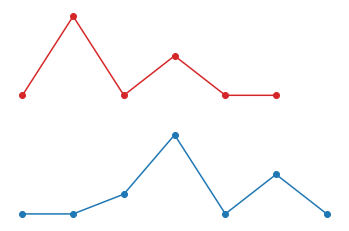

In [3]:
x = np.array([0, 2, 0, 1, 0, 0])
y = np.array([0, 0, 0.5, 2, 0, 1, 0])

plt.figure(figsize=(6, 4))
plt.plot(np.arange(x.shape[0])+1, x+1.5, '-o', c='C3')
plt.plot(np.arange(y.shape[0])+1, y-1.5, '-o', c='C0')
plt.axis("off")


(-0.30000000000000004, 6.3, -1.75, 3.75)

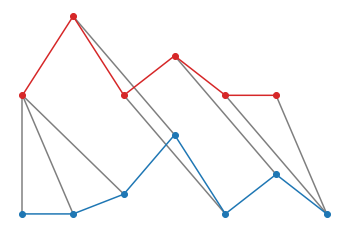

In [4]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i]-y[j])

# DTW
path, cost_mat = dp(dist_mat)

# Plot alignment
plt.figure(figsize=(6, 4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i]+1.5, y[y_j]-1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x+1.5, '-o', c='C3')
plt.plot(np.arange(y.shape[0]), y-1.5, '-o', c='C0')
plt.axis("off")


Text(0, 0.5, '$i$')

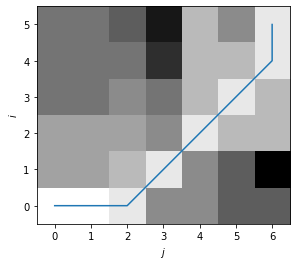

In [5]:
plt.figure(figsize=(6,4))
plt.imshow(cost_mat,cmap=plt.cm.binary,interpolation="nearest",origin='lower')
x_path, y_path = zip(*path)
plt.plot(y_path,x_path)
plt.xlabel("$j$")
plt.ylabel("$i$")

In [6]:
from matplotlib import pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from playsound import playsound
import numpy as np
import os

# Read stored audio files for comparison
x1, sr1 = librosa.load("./doors-and-corners-kid_thats-where-they-get-you.wav")
x2, sr2 = librosa.load("./doors-and-corners-kid_thats-where-they-get-you-2.wav")
x3, sr3 = librosa.load("./you-walk-into-a-room-too-fast_the-room-eats-you.wav")
x4, sr4 = librosa.load("./doors-and-corners-kid.wav")

In [7]:
playsound("./doors-and-corners-kid_thats-where-they-get-you.wav")

In [8]:
playsound("./doors-and-corners-kid_thats-where-they-get-you-2.wav")

In [9]:
playsound("./you-walk-into-a-room-too-fast_the-room-eats-you.wav")

In [10]:
playsound("./doors-and-corners-kid.wav")

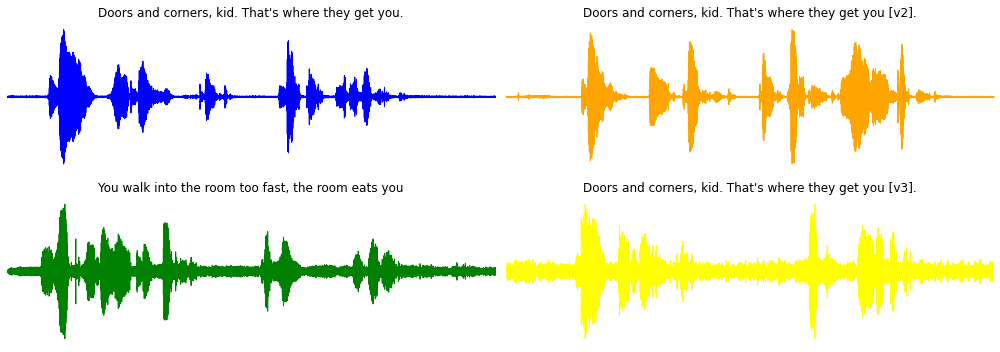

In [11]:

"""
Audio Visualizations
Below are visualizations using matplotlib of the four audio clips:

Clip 1: This is our base time series based on the quote Doors and corners, kid. That's where they get you.
Clip 2: This is a new time series [v2] based on clip 1 where the intonation and speech pattern is extremely exagerated.
Clip 3: This is another time series that's based on the quote You walk into the room too fast, the room eats you. with the same intonation and speed as Clip 1.
Clip 4: This is a new time seris [v3] based on clip 1 where the intonation and speech pattern is similar to clip 1.
"""
fig = plt.figure(figsize=(14,5))

plt.subplot(221)
librosa.display.waveplot(x1,sr=sr1,color="blue")
plt.title("Doors and corners, kid. That's where they get you.")
plt.axis("off")
plt.grid()

plt.subplot(222)
librosa.display.waveplot(x2,sr=sr2,color="orange")
plt.title("Doors and corners, kid. That's where they get you [v2].")
plt.axis("off")
plt.grid()

plt.subplot(223)
librosa.display.waveplot(x3,sr=sr3,color="green")
plt.title("You walk into the room too fast, the room eats you")
plt.axis("off")
plt.grid()

plt.subplot(224)
librosa.display.waveplot(x4,sr=sr4,color="yellow")
plt.title("Doors and corners, kid. That's where they get you [v3].")
plt.axis("off")
plt.grid()

fig.tight_layout()
plt.show()


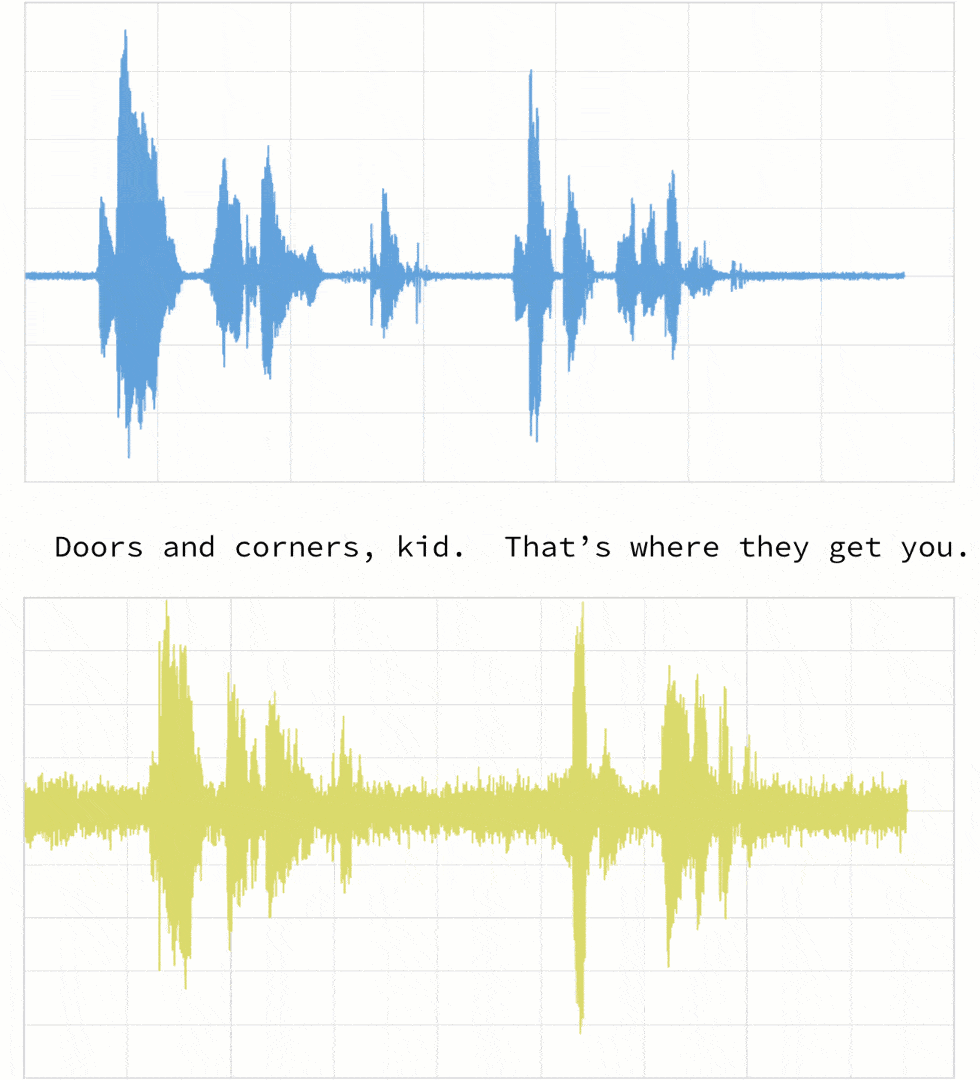

In [19]:
from IPython.display import Image
Image(filename="./dtw-animated.gif.png")

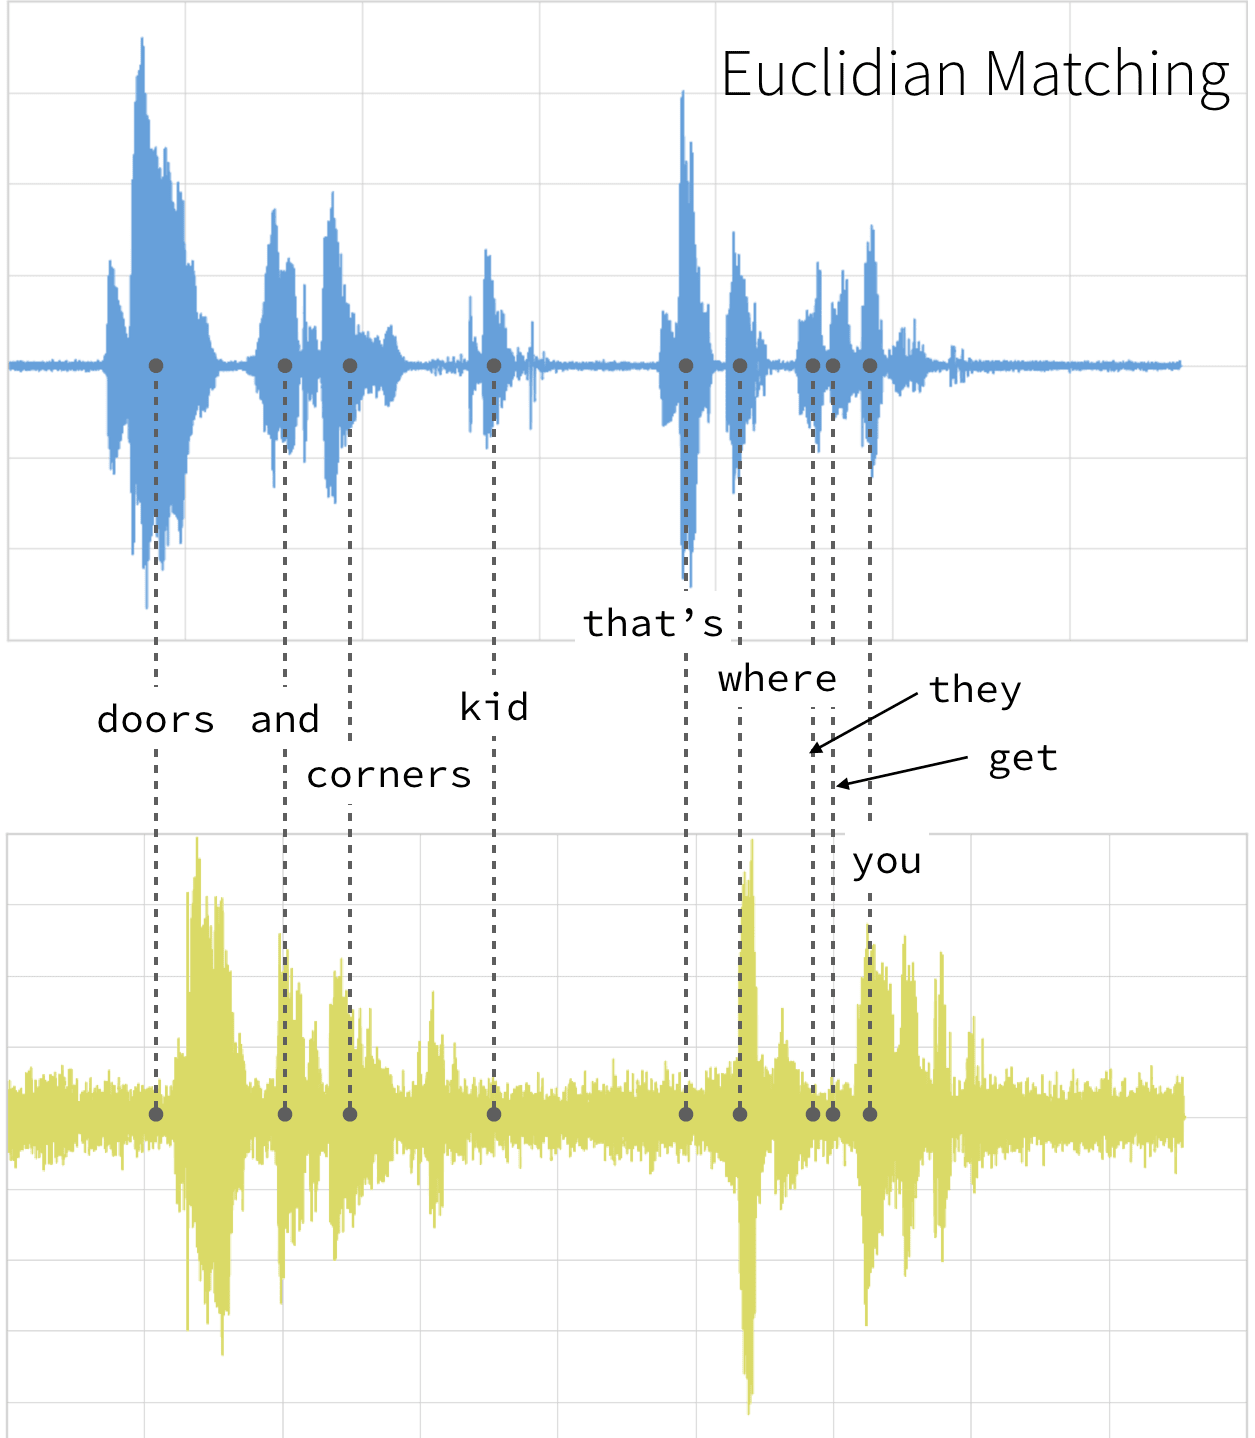

In [13]:
from IPython.display import Image
Image(filename="./euclidean-matching.png")


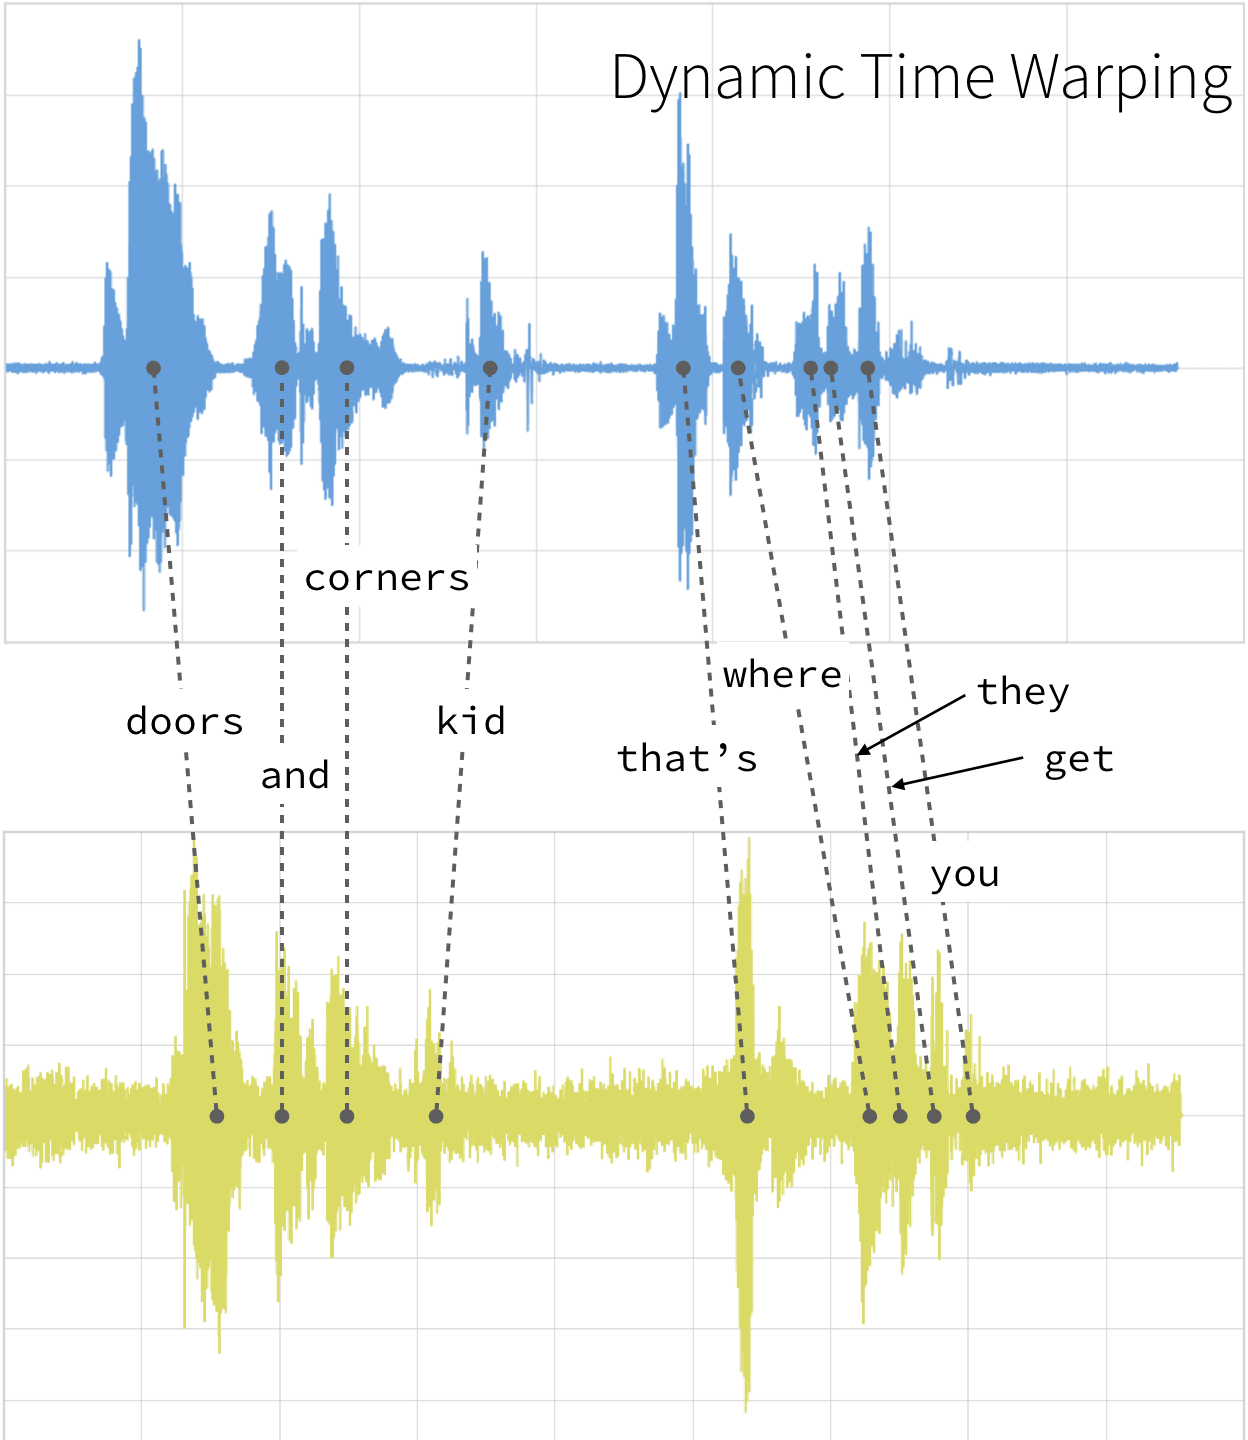

In [14]:
from IPython.display import Image
Image(filename="./dynamic-time-warping.png")


In [15]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# Read stored audio files for comparison
fs1, data1 = wavfile.read("./doors-and-corners-kid_thats-where-they-get-you.wav")
fs2, data2 = wavfile.read("./doors-and-corners-kid_thats-where-they-get-you-2.wav")
fs3, data3 = wavfile.read("./you-walk-into-a-room-too-fast_the-room-eats-you.wav")
fs4, data4 = wavfile.read("./doors-and-corners-kid.wav")

# Take the max values along axis
data1 = np.amax(data1, axis=1)
data2 = np.amax(data2, axis=1)
data3 = np.amax(data3, axis=1)
data4 = np.amax(data4, axis=1)

471222169.0


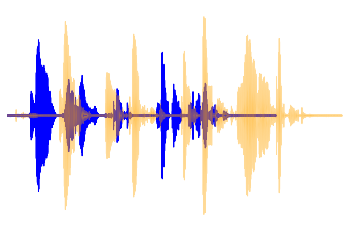

In [16]:
# Let's compare Clip 1 and Clip 2
librosa.display.waveplot(x1,sr=sr1,color='blue')
librosa.display.waveplot(x2,sr=sr2,color="orange",alpha=0.4)
plt.axis("off")
print(fastdtw(data1,data2)[0])


298533012.0


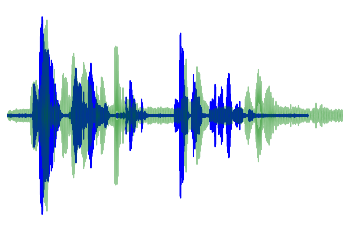

In [17]:
# Let's comapare Clip 1 and Clip 3
librosa.display.waveplot(x1,sr=sr1,color='blue')
librosa.display.waveplot(x3,sr=sr3,color="green",alpha=0.4)
plt.axis("off")
print(fastdtw(data1,data3)[0])


287169343.0


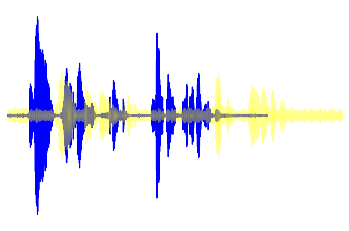

In [18]:
# Let's compare Clip 1 and Clip 4

librosa.display.waveplot(x1,sr=sr1,color='blue')
librosa.display.waveplot(x4,sr=sr4,color="yellow",alpha=0.4)
plt.axis("off")
print(fastdtw(data1,data4)[0])